Take overview

In [1]:
import pandas as pd

file_path = 'nc_winston-salem_2020_04_01.csv'
crime_data = pd.read_csv(file_path)
crime_data.head(), crime_data.isna().sum()


<ipython-input-1-87de41a8e5b8>:4: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pd.read_csv(file_path)


(   raw_row_number        date      time location county_name  subject_age  \
 0            3225  2000-01-11  23:30:00  Unknown         NaN         49.0   
 1            3227  2000-01-12  00:59:00  Unknown         NaN         21.0   
 2            3232  2000-01-12  21:05:00  Unknown         NaN         22.0   
 3            3235  2000-01-12  21:05:00  Unknown         NaN         21.0   
 4            3237  2000-01-12  22:37:00  Unknown         NaN         19.0   
 
   subject_race subject_sex officer_id_hash  \
 0        black      female      22e35044ed   
 1        black        male      22e35044ed   
 2        white        male      22e35044ed   
 3        black      female      22e35044ed   
 4        black      female      22e35044ed   
 
                                     department_name  ... search_conducted  \
 0  Winston-Salem State University Police Department  ...            False   
 1  Winston-Salem State University Police Department  ...            False   
 2  Winston-

removed columns with a high number of missing values. The dataset now has 21 columns remaining. Next, I'll encode relevant categorical columns for the analysis

In [2]:

columns_to_drop = [
    'contraband_found', 'contraband_drugs', 'contraband_weapons',
    'search_basis', 'reason_for_frisk', 'reason_for_search', 'outcome', 'time'
]
crime_data_cleaned = crime_data.drop(columns=columns_to_drop)

crime_data_cleaned.columns
crime_data_encoded = pd.get_dummies(crime_data_cleaned, columns=['subject_race', 'subject_sex'], drop_first=True)
crime_data_encoded.head()


,raw_row_number,date,location,county_name,subject_age,officer_id_hash,department_name,type,arrest_made,citation_issued,...,reason_for_stop,raw_Ethnicity,raw_Race,raw_action_description,subject_race_black,subject_race_hispanic,subject_race_other,subject_race_unknown,subject_race_white,subject_sex_male
0,3225,2000-01-11,Unknown,NaN,49.0,22e35044ed,Winston-Salem State University Police Department,vehicular,False,False,...,Speed Limit Violation,N,B,Verbal Warning,True,False,False,False,False,False
1,3227,2000-01-12,Unknown,NaN,21.0,22e35044ed,Winston-Salem State University Police Department,vehicular,False,True,...,Speed Limit Violation,N,B,Citation Issued,True,False,False,False,False,True
2,3232,2000-01-12,Unknown,NaN,22.0,22e35044ed,Winston-Salem State University Police Department,vehicular,False,False,...,Speed Limit Violation,N,W,Written Warning,False,False,False,False,True,True
3,3235,2000-01-12,Unknown,NaN,21.0,22e35044ed,Winston-Salem State University Police Department,vehicular,False,True,...,Safe Movement Violation,N,B,Citation Issued,True,False,False,False,False,False
4,3237,2000-01-12,Unknown,NaN,19.0,22e35044ed,Winston-Salem State University Police Department,vehicular,False,False,...,Safe Movement Violation,N,B,Verbal Warning,True,False,False,False,False,False


plot relevant plots

<Figure size 1000x600 with 0 Axes>

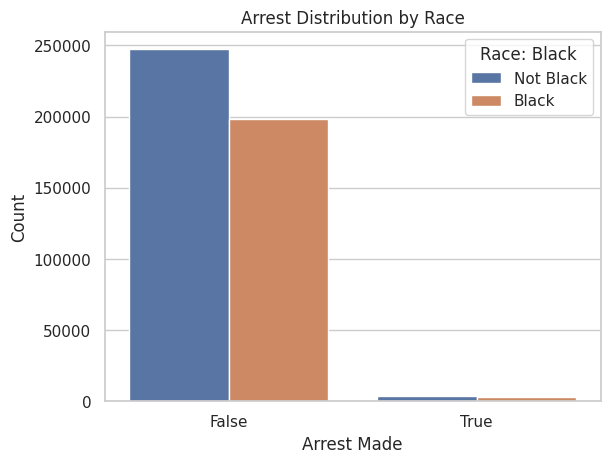

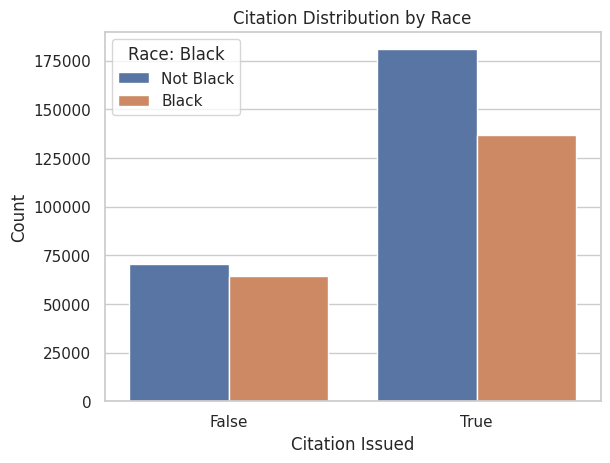

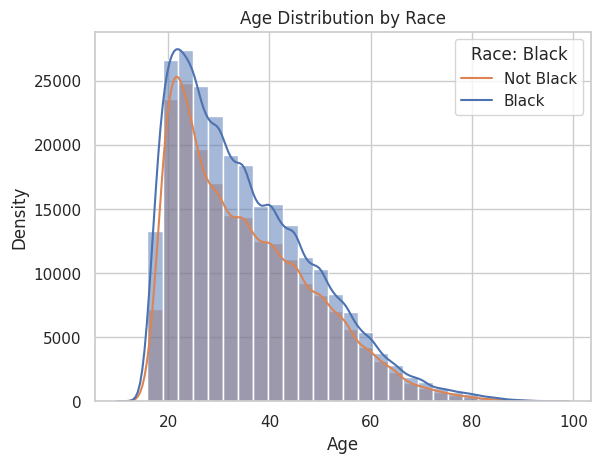

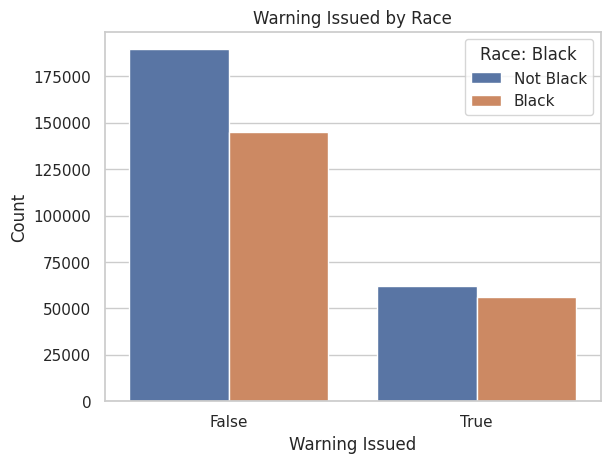

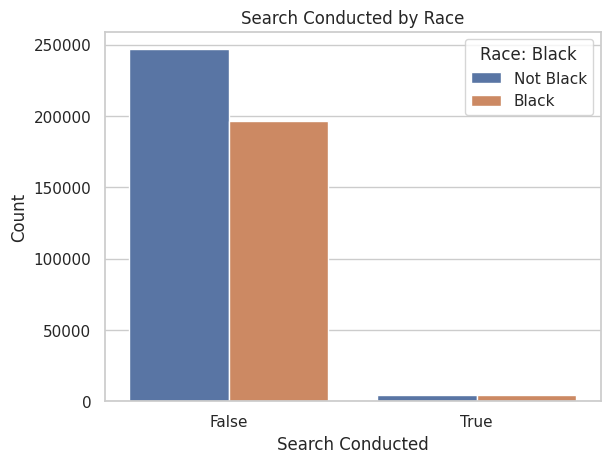

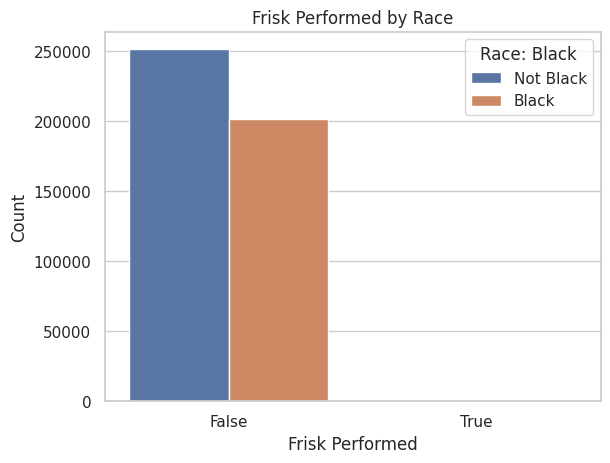

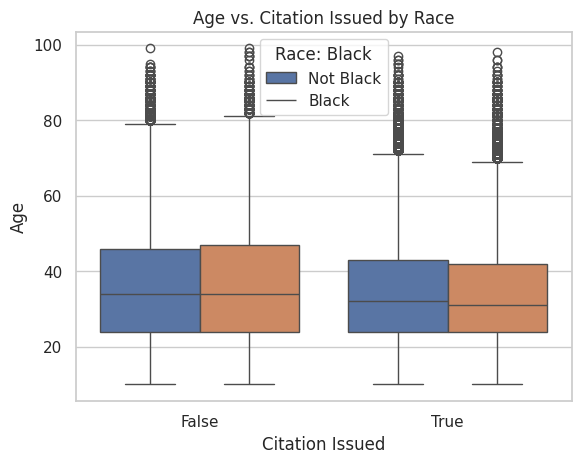

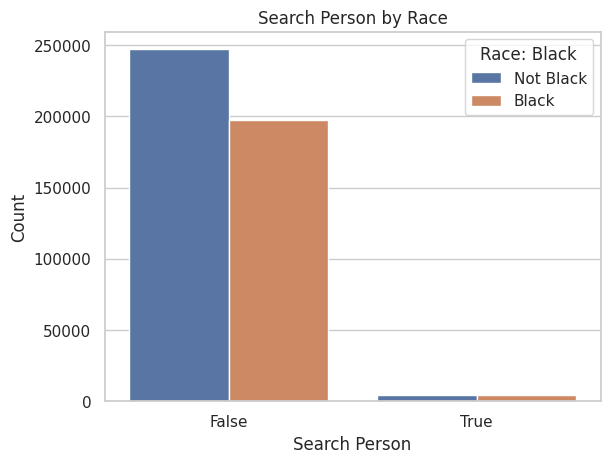

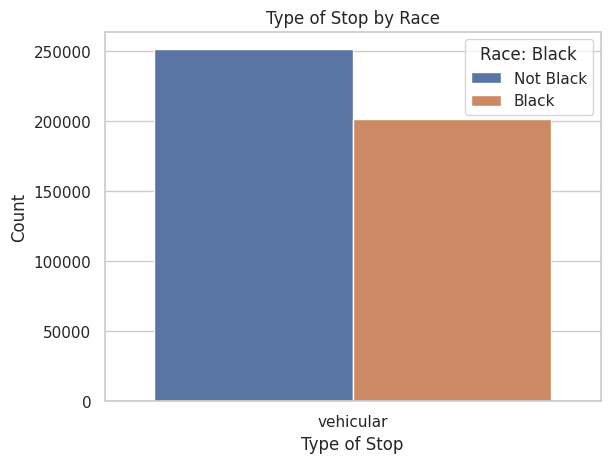

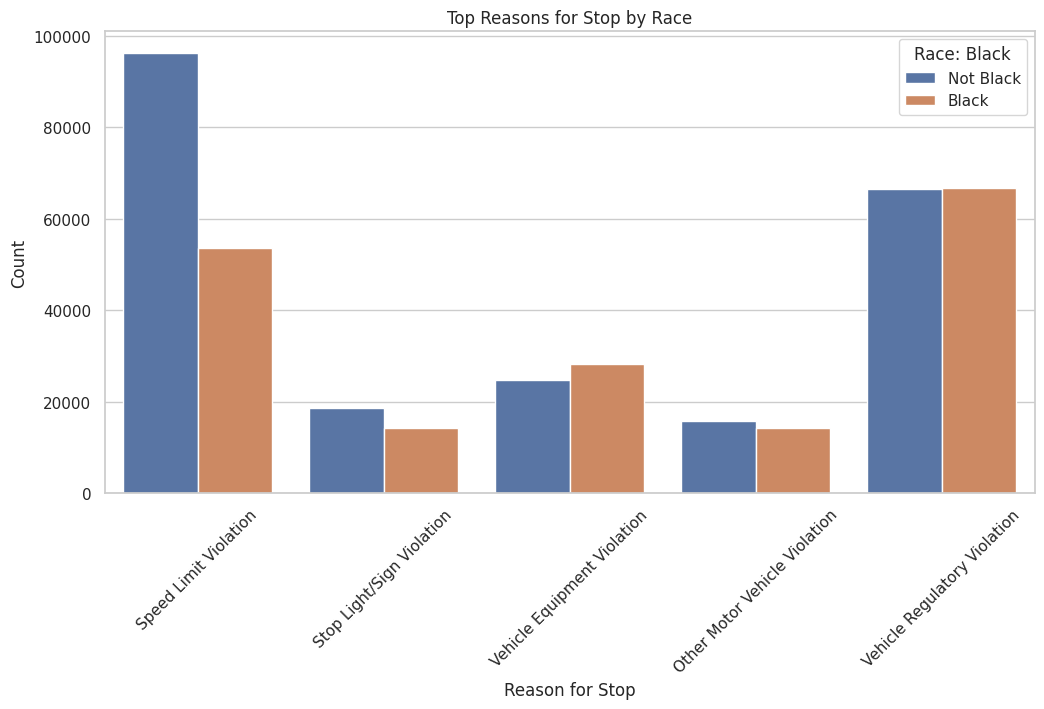

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot 1: Distribution of arrests by race
plt.figure()
sns.countplot(data=crime_data_encoded, x='arrest_made', hue='subject_race_black')
plt.title('Arrest Distribution by Race')
plt.xlabel('Arrest Made')
plt.ylabel('Count')
plt.legend(title='Race: Black', labels=['Not Black', 'Black'])
plt.show()

# Plot 2: Distribution of citations issued by race
plt.figure()
sns.countplot(data=crime_data_encoded, x='citation_issued', hue='subject_race_black')
plt.title('Citation Distribution by Race')
plt.xlabel('Citation Issued')
plt.ylabel('Count')
plt.legend(title='Race: Black', labels=['Not Black', 'Black'])
plt.show()

# Plot 3: Age distribution by race
plt.figure()
sns.histplot(data=crime_data_encoded, x='subject_age', hue='subject_race_black', kde=True, bins=30)
plt.title('Age Distribution by Race')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Race: Black', labels=['Not Black', 'Black'])
plt.show()

# Plot 4: Frequency of warnings by race
plt.figure()
sns.countplot(data=crime_data_encoded, x='warning_issued', hue='subject_race_black')
plt.title('Warning Issued by Race')
plt.xlabel('Warning Issued')
plt.ylabel('Count')
plt.legend(title='Race: Black', labels=['Not Black', 'Black'])
plt.show()

# Plot 5: Distribution of search conducted by race
plt.figure()
sns.countplot(data=crime_data_encoded, x='search_conducted', hue='subject_race_black')
plt.title('Search Conducted by Race')
plt.xlabel('Search Conducted')
plt.ylabel('Count')
plt.legend(title='Race: Black', labels=['Not Black', 'Black'])
plt.show()

# Plot 6: Frisk performed by race
plt.figure()
sns.countplot(data=crime_data_encoded, x='frisk_performed', hue='subject_race_black')
plt.title('Frisk Performed by Race')
plt.xlabel('Frisk Performed')
plt.ylabel('Count')
plt.legend(title='Race: Black', labels=['Not Black', 'Black'])
plt.show()

# Plot 7: Age vs. Citation Issued colored by race
plt.figure()
sns.boxplot(data=crime_data_encoded, x='citation_issued', y='subject_age', hue='subject_race_black')
plt.title('Age vs. Citation Issued by Race')
plt.xlabel('Citation Issued')
plt.ylabel('Age')
plt.legend(title='Race: Black', labels=['Not Black', 'Black'])
plt.show()

# Plot 8: Search Person by Race
plt.figure()
sns.countplot(data=crime_data_encoded, x='search_person', hue='subject_race_black')
plt.title('Search Person by Race')
plt.xlabel('Search Person')
plt.ylabel('Count')
plt.legend(title='Race: Black', labels=['Not Black', 'Black'])
plt.show()

# Plot 9: Outcome of Stops by Race
plt.figure()
sns.countplot(data=crime_data_encoded, x='type', hue='subject_race_black')
plt.title('Type of Stop by Race')
plt.xlabel('Type of Stop')
plt.ylabel('Count')
plt.legend(title='Race: Black', labels=['Not Black', 'Black'])
plt.show()

# Plot 10: Reason for Stop by Race (focusing on common reasons for stops)
plt.figure(figsize=(12, 6))
top_reasons = crime_data_encoded['reason_for_stop'].value_counts().nlargest(5).index
filtered_data = crime_data_encoded[crime_data_encoded['reason_for_stop'].isin(top_reasons)]
sns.countplot(data=filtered_data, x='reason_for_stop', hue='subject_race_black')
plt.title('Top Reasons for Stop by Race')
plt.xlabel('Reason for Stop')
plt.ylabel('Count')
plt.legend(title='Race: Black', labels=['Not Black', 'Black'])
plt.xticks(rotation=45)
plt.show()


Consider time trends, plot relevant plots

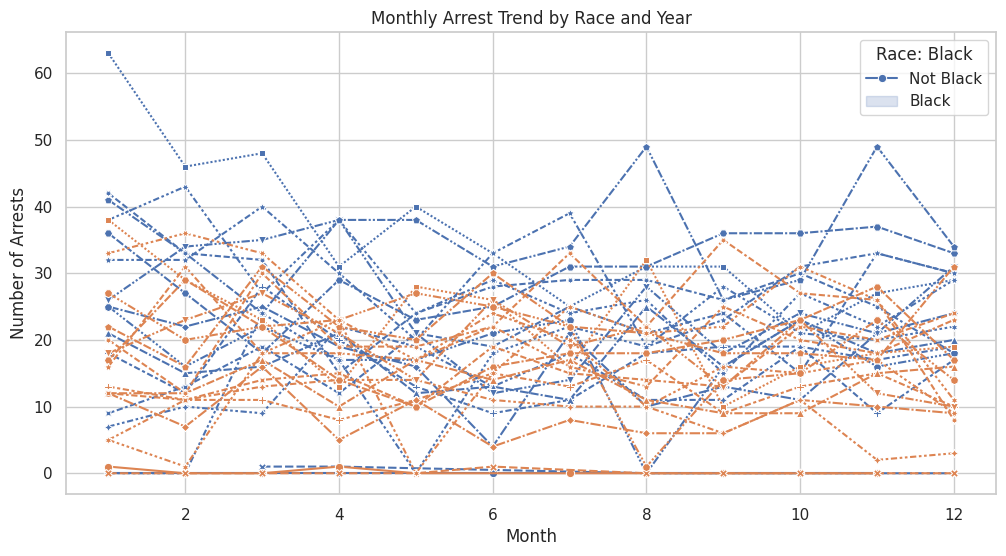

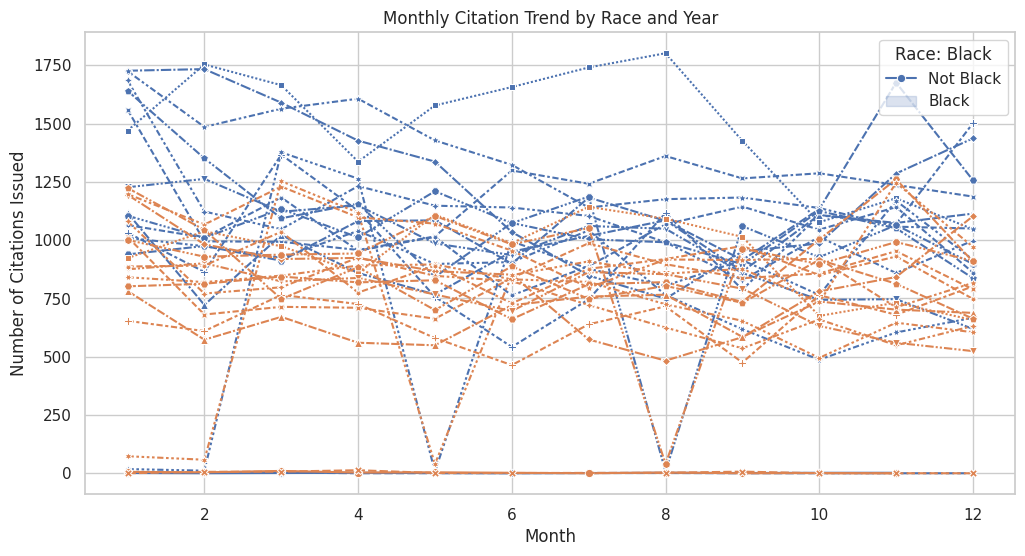

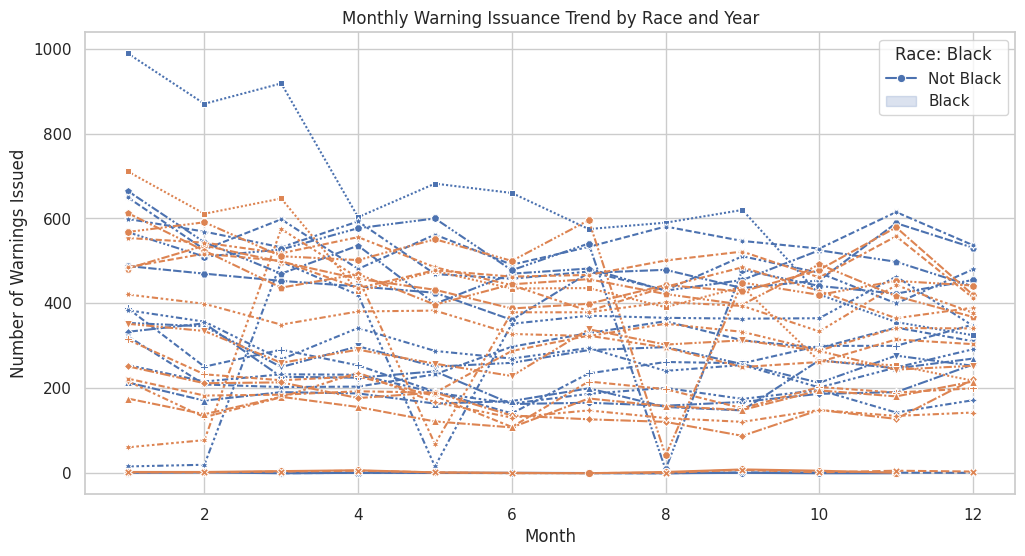

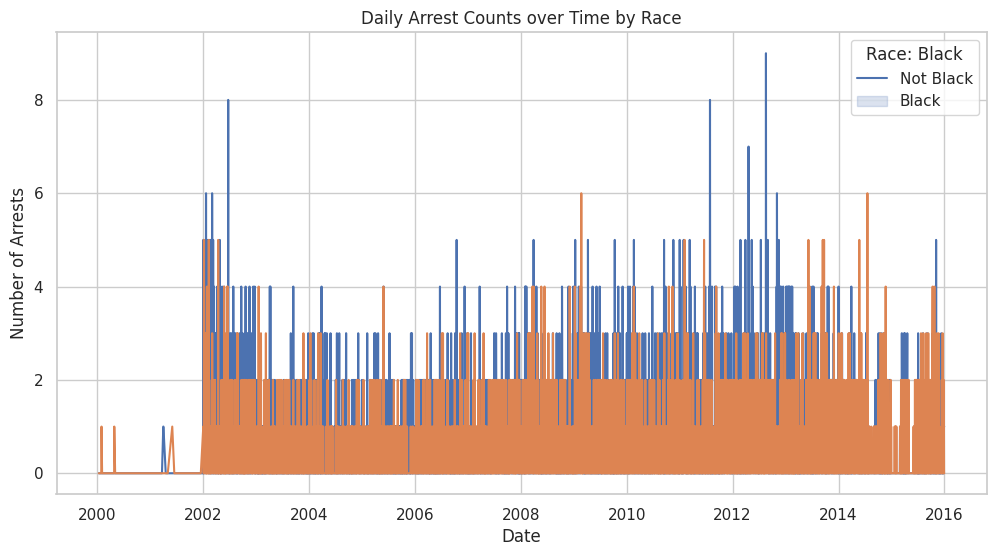

In [4]:
# Parse the 'date' column to extract year, month, and day for time-based analysis
crime_data_encoded['date'] = pd.to_datetime(crime_data_encoded['date'], errors='coerce')

# Extracting year and month for time-based analysis
crime_data_encoded['year'] = crime_data_encoded['date'].dt.year
crime_data_encoded['month'] = crime_data_encoded['date'].dt.month
crime_data_encoded.dropna(subset=['date'], inplace=True)

# Plot 1: Monthly Arrest Trend by Race
plt.figure(figsize=(12, 6))
monthly_arrest = crime_data_encoded.groupby(['year', 'month', 'subject_race_black'])['arrest_made'].sum().reset_index()
sns.lineplot(data=monthly_arrest, x='month', y='arrest_made', hue='subject_race_black', style='year', markers=True)
plt.title('Monthly Arrest Trend by Race and Year')
plt.xlabel('Month')
plt.ylabel('Number of Arrests')
plt.legend(title='Race: Black', labels=['Not Black', 'Black'])
plt.show()

# Plot 2: Monthly Citation Trend by Race
plt.figure(figsize=(12, 6))
monthly_citation = crime_data_encoded.groupby(['year', 'month', 'subject_race_black'])['citation_issued'].sum().reset_index()
sns.lineplot(data=monthly_citation, x='month', y='citation_issued', hue='subject_race_black', style='year', markers=True)
plt.title('Monthly Citation Trend by Race and Year')
plt.xlabel('Month')
plt.ylabel('Number of Citations Issued')
plt.legend(title='Race: Black', labels=['Not Black', 'Black'])
plt.show()

# Plot 3: Monthly Warning Issuance Trend by Race
plt.figure(figsize=(12, 6))
monthly_warning = crime_data_encoded.groupby(['year', 'month', 'subject_race_black'])['warning_issued'].sum().reset_index()
sns.lineplot(data=monthly_warning, x='month', y='warning_issued', hue='subject_race_black', style='year', markers=True)
plt.title('Monthly Warning Issuance Trend by Race and Year')
plt.xlabel('Month')
plt.ylabel('Number of Warnings Issued')
plt.legend(title='Race: Black', labels=['Not Black', 'Black'])
plt.show()

# Plot 4: Daily Arrests over Years by Race
plt.figure(figsize=(12, 6))
daily_arrest = crime_data_encoded.groupby(['date', 'subject_race_black'])['arrest_made'].sum().reset_index()
sns.lineplot(data=daily_arrest, x='date', y='arrest_made', hue='subject_race_black')
plt.title('Daily Arrest Counts over Time by Race')
plt.xlabel('Date')
plt.ylabel('Number of Arrests')
plt.legend(title='Race: Black', labels=['Not Black', 'Black'])
plt.show()


Considering the severity of crimes, perform EDA on if different race do differently in severity.

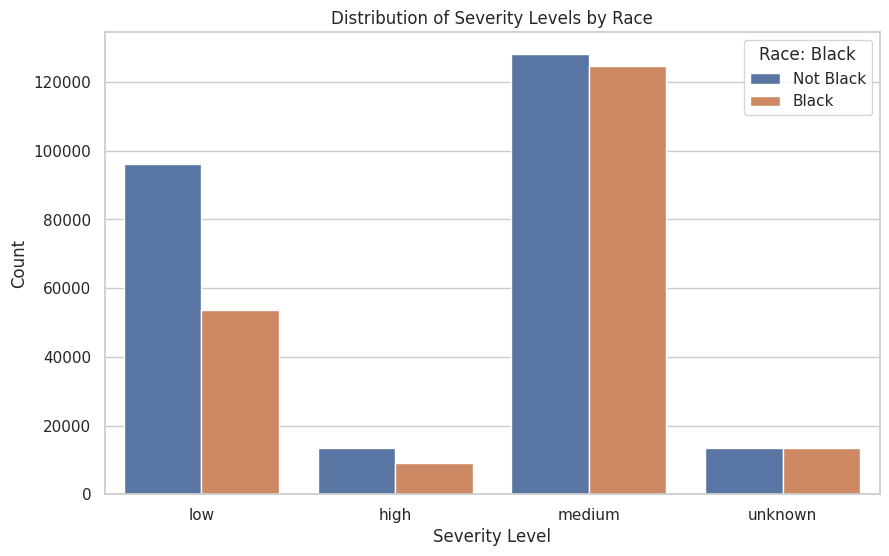

<Figure size 1000x600 with 0 Axes>

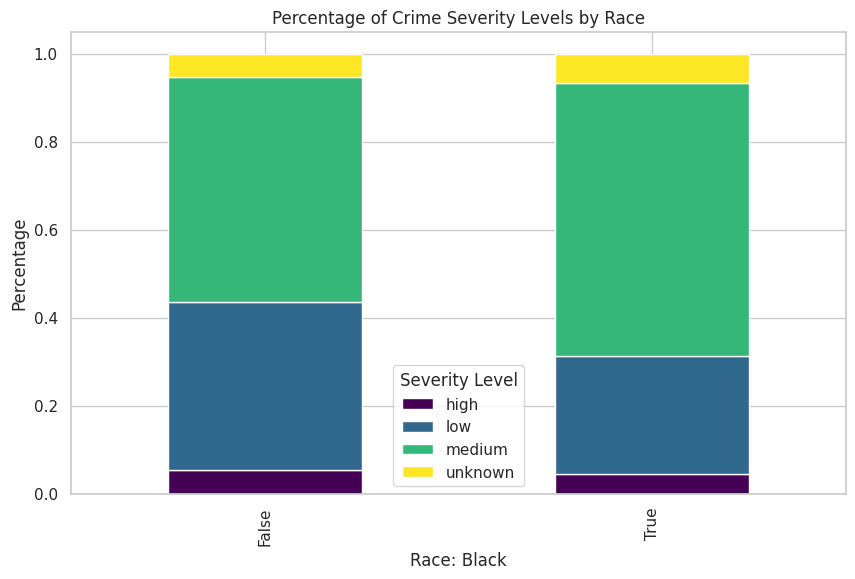

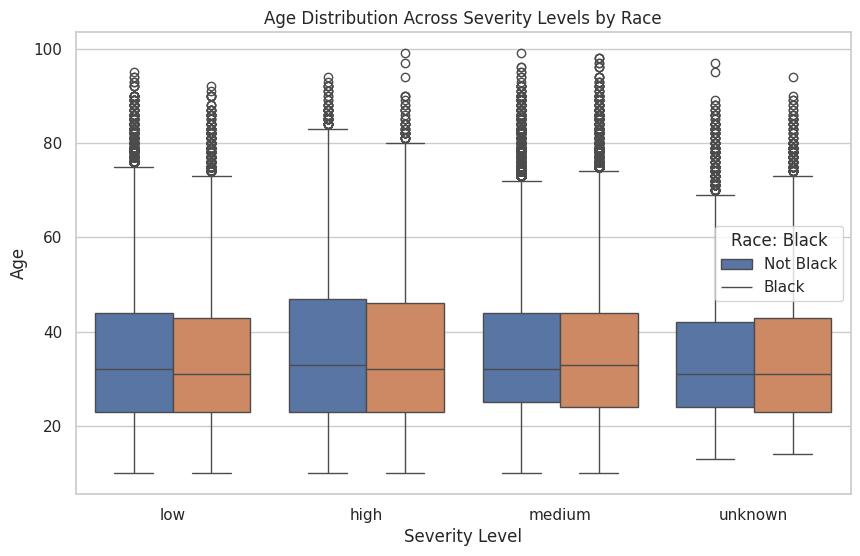

In [5]:

def classify_severity(reason):
    if pd.isnull(reason):
        return 'unknown'
    elif 'speed' in reason.lower() or 'seatbelt' in reason.lower():
        return 'low'
    elif 'stop' in reason.lower() or 'impaired' in reason.lower() or 'vehicle' in reason.lower() :
        return 'medium'
    elif 'safe' in reason.lower() or 'license' in reason.lower():
        return 'high'
    else:
        return 'unknown'
crime_data_encoded['severity_level'] = crime_data_encoded['reason_for_stop'].apply(classify_severity)
#crime_data_encoded['severity_level'] = crime_data_encoded[['crime_severity_high', 'crime_severity_medium', 'crime_severity_low']].idxmax(axis=1)

# Plot 1: Distribution of severity levels by race
plt.figure(figsize=(10, 6))
sns.countplot(data=crime_data_encoded, x='severity_level', hue='subject_race_black')
plt.title('Distribution of Severity Levels by Race')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.legend(title='Race: Black', labels=['Not Black', 'Black'])
plt.show()

# Plot 2: Crime severity percentage breakdown by race
plt.figure(figsize=(10, 6))
severity_percentage = crime_data_encoded.groupby('subject_race_black')['severity_level'].value_counts(normalize=True).unstack()
severity_percentage.plot(kind='bar', stacked=True, colormap="viridis", figsize=(10,6))
plt.title('Percentage of Crime Severity Levels by Race')
plt.xlabel('Race: Black')
plt.ylabel('Percentage')
plt.legend(title='Severity Level')
plt.show()


# Plot 4: Average age of subjects in each severity level by race
plt.figure(figsize=(10, 6))
sns.boxplot(data=crime_data_encoded, x='severity_level', y='subject_age', hue='subject_race_black')
plt.title('Age Distribution Across Severity Levels by Race')
plt.xlabel('Severity Level')
plt.ylabel('Age')
plt.legend(title='Race: Black', labels=['Not Black', 'Black'])
plt.show()


Assigning dummy variables for severity level of crimes, observe logistics regression on them.

In [8]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
severity_mapping = {'low': 1, 'medium': 2, 'high': 3}
crime_data_encoded = crime_data_encoded[crime_data_encoded['severity_level'] != 'unknown']
crime_data_encoded['severity_level_numeric'] = crime_data_encoded['severity_level'].map(severity_mapping)
black_data = crime_data_encoded[crime_data_encoded['subject_race_black'] == 1]
non_black_data = crime_data_encoded[crime_data_encoded['subject_race_black'] == 0]
black_data = black_data.dropna(subset=['subject_age'])
non_black_data = non_black_data.dropna(subset=['subject_age'])

# Prepare data for logistic regression (Black subjects)
X_black = pd.DataFrame({
    'time_in_months': black_data['year'] * 12 + black_data['month'],
    'subject_age': black_data['subject_age']
})
y_black = black_data['severity_level_numeric']

# Prepare data for logistic regression (Non-Black subjects)
X_non_black = pd.DataFrame({
    'time_in_months': non_black_data['year'] * 12 + non_black_data['month'],
    'subject_age': non_black_data['subject_age']
})
y_non_black = non_black_data['severity_level_numeric']

# Train logistic regression model for Black subjects
log_reg_black = LogisticRegression(max_iter=1000)
log_reg_black.fit(X_black, y_black)

# Train logistic regression model for Non-Black subjects
log_reg_non_black = LogisticRegression(max_iter=1000)
log_reg_non_black.fit(X_non_black, y_non_black)

# Retrieve and display model parameters (coefficients and intercepts) for both groups
black_model_params = {'coefficients': log_reg_black.coef_, 'intercept': log_reg_black.intercept_}
non_black_model_params = {'coefficients': log_reg_non_black.coef_, 'intercept': log_reg_non_black.intercept_}

black_model_params, non_black_model_params



<ipython-input-8-6945c9f64996>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data_encoded['severity_level_numeric'] = crime_data_encoded['severity_level'].map(severity_mapping)


({'coefficients': array([[ 2.09049227e-05, -5.66256209e-03],
         [ 4.50066482e-05,  1.87753408e-03],
         [-6.59115709e-05,  3.78502800e-03]]),
  'intercept': array([ 1.08837939e-05, -1.00211944e-05, -8.62599454e-07])},
 {'coefficients': array([[ 2.73439955e-05, -2.89492817e-03],
         [ 3.75429339e-05, -1.71760889e-03],
         [-6.48869294e-05,  4.61253706e-03]]),
  'intercept': array([ 1.11031297e-05, -9.81579479e-06, -1.28733492e-06])})

 The intercept values are minimal for both racial groups, suggesting that the baseline severity prediction does not strongly favor one severity level over another without considering the input variables.

 For Black subjects, the subject_age coefficient is slightly more negative for the "low severity" level (-5.66e-03) than for non-Black subjects (-2.89e-03). This suggests that age might be slightly more negatively correlated with the likelihood of low-severity stops for Black subjects.

 The coefficients for both variables (time_in_months and subject_age) across all categories are very small, suggesting these features alone do not significantly predict severity level.